In [5]:
# Import dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.facecolor"] = "white"


cid_number = 10000 # TODO: this is hardcoded so far


con_k15 = psycopg2.connect(
    host="localhost",
    port="5432",
    database="cid_hoarder_k15_hops",
    user="hoarder",
    password="password")

con_k20 = psycopg2.connect(
    host="localhost",
    port="5432",
    database="cid_hoarder_k20_hops",
    user="hoarder",
    password="password")

con_k25 = psycopg2.connect(
    host="localhost",
    port="5432",
    database="cid_hoarder_k25_hops",
    user="hoarder",
    password="password")

con_k40 = psycopg2.connect(
    host="localhost",
    port="5432",
    database="cid_hoarder_k40_hops",
    user="hoarder",
    password="password")



dbs = [con_k15, con_k20, con_k25, con_k40]
db_labels = ['k=15', 'k=20', 'k=25', 'k=40']
"""


con_k20 = psycopg2.connect(
    host="localhost",
    port="5432",
    database="cid_hoarder_k20_hops",
    user="hoarder",
    password="password")

con_k20_no_hydras = psycopg2.connect(
    host="localhost",
    port="5432",
    database="cid_hoarder_k20_no_hydras",
    user="hoarder",
    password="password")

dbs = [con_k20, con_k20_no_hydras]
db_labels = ['k=20', 'k=20_no_hydras']
"""


box_idxs = np.arange(len(dbs))

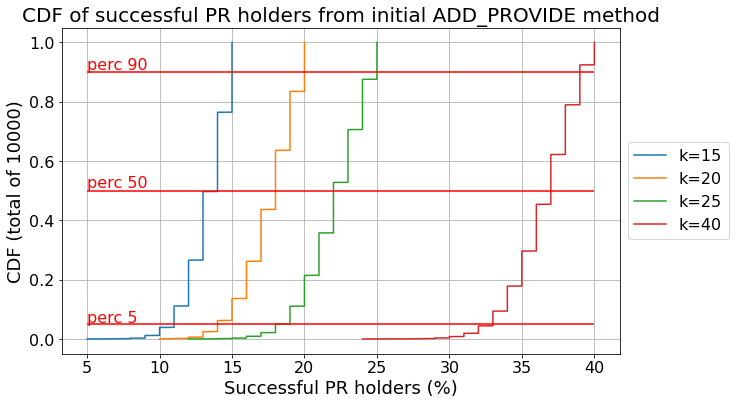

In [13]:
# Comparison of the successfull ADD_PROVIDE 

fig, ax = plt.subplots()


# Make PostgreSQL query at each of the DB connetions
for i, con in enumerate(dbs):
    pobj = pd.read_sql_query(f"""
    select success_att from fetch_results where ping_round=0 order by success_att ASC
    """, con)
    ax.plot(pobj["success_att"], np.linspace(0, 1, len(pobj)), label=db_labels[i])

# Plot metadata
plt.title("CDF of successful PR holders from initial ADD_PROVIDE method", fontsize=20)
plt.xlabel("Successful PR holders (%)", fontsize=18)
plt.ylabel(f"CDF (total of {cid_number})", fontsize=18)

# Legend
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16})

# Lines
plt.hlines(y=[0.05], xmin=5, xmax=pobj.iloc[len(pobj)-1]['success_att'], color='r', linestyle='-', label='5%')
plt.text(5, 0.072, 'perc 5', ha='left', va='center', color='r', fontsize=16)
plt.hlines(y=[0.50], xmin=5, xmax=pobj.iloc[len(pobj)-1]['success_att'], color='r', linestyle='-', label='50%')
plt.text(5, 0.525, 'perc 50', ha='left', va='center', color='r', fontsize=16)
plt.hlines(y=[0.90], xmin=5, xmax=pobj.iloc[len(pobj)-1]['success_att'], color='r', linestyle='-', label='90%')
plt.text(5, 0.925, 'perc 90', ha='left', va='center', color='r', fontsize=16)


plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)

plt.grid()


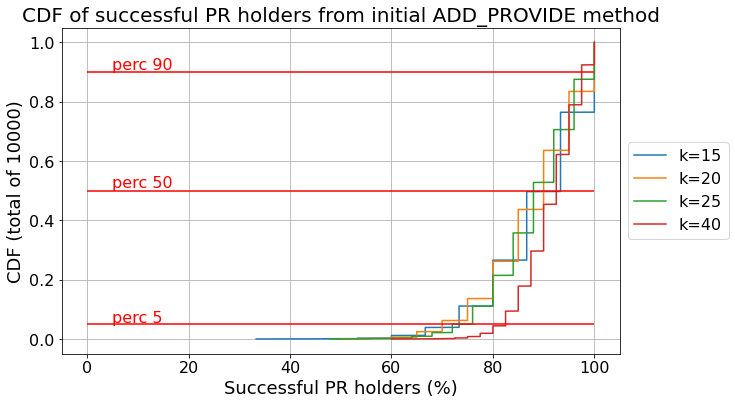

In [19]:
# Comparison of the successfull ADD_PROVIDE 

fig, ax = plt.subplots()


# Make PostgreSQL query at each of the DB connetions
for i, con in enumerate(dbs):
    pobj = pd.read_sql_query(f"""
    select success_att from fetch_results where ping_round=0 order by success_att ASC
    """, con)
    # TEMPORARY FOR REPORT
    pobj["%"] = (pobj["success_att"] / pobj["success_att"].max()) * 100 
    ax.plot(pobj["%"], np.linspace(0, 1, len(pobj)), label=db_labels[i])

# Plot metadata
plt.title("CDF of successful PR holders from initial ADD_PROVIDE method", fontsize=20)
plt.xlabel("Successful PR holders (%)", fontsize=18)
plt.ylabel(f"CDF (total of {cid_number})", fontsize=18)

# Legend
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16})

# Lines
plt.hlines(y=[0.05], xmin=0, xmax=100, color='r', linestyle='-', label='5%')
plt.text(5, 0.072, 'perc 5', ha='left', va='center', color='r', fontsize=16)
plt.hlines(y=[0.50], xmin=0, xmax=100, color='r', linestyle='-', label='50%')
plt.text(5, 0.525, 'perc 50', ha='left', va='center', color='r', fontsize=16)
plt.hlines(y=[0.90], xmin=0, xmax=100, color='r', linestyle='-', label='90%')
plt.text(5, 0.925, 'perc 90', ha='left', va='center', color='r', fontsize=16)


plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)

plt.grid()


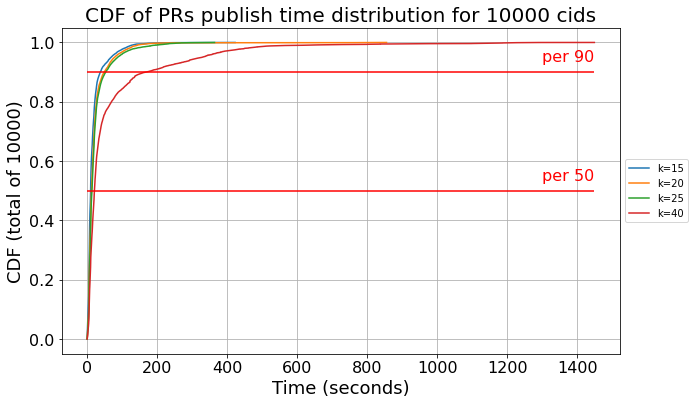

In [15]:
# Comparison of the DHT_Provide times CDF

fig, ax = plt.subplots()

# Iter through DBs
for i, con in enumerate(dbs):
    pobj = pd.read_sql_query("select provide_time from cid_info order by provide_time ASC", con)
    pobj['provide_time'] = pobj['provide_time'] / 1000  # convert to secods
    
    ax.plot(pobj["provide_time"], np.linspace(0, 1, len(pobj)), label=db_labels[i])

# Plot metadata
plt.title(f'CDF of PRs publish time distribution for {len(pobj)} cids', fontsize=20)
plt.xlabel("Time (seconds)", fontsize=18)
plt.ylabel(f"CDF (total of {cid_number})", fontsize=18)

# Legend
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Lines
plt.hlines(y=[0.50], xmin=pobj.iloc[0]['provide_time'], xmax=pobj.iloc[len(pobj)-1]['provide_time'], color='r', linestyle='-', label='50%')
plt.text(pobj.iloc[-1]['provide_time']-0.1, 0.55, 'per 50', ha='right', va='center', color='r', fontsize=16)
plt.hlines(y=[0.90], xmin=pobj.iloc[0]['provide_time'], xmax=pobj.iloc[len(pobj)-1]['provide_time'], color='r', linestyle='-', label='50%')
plt.text(pobj.iloc[-1]['provide_time']-0.1, 0.95, 'per 90', ha='right', va='center', color='r', fontsize=16)

plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)

plt.grid()


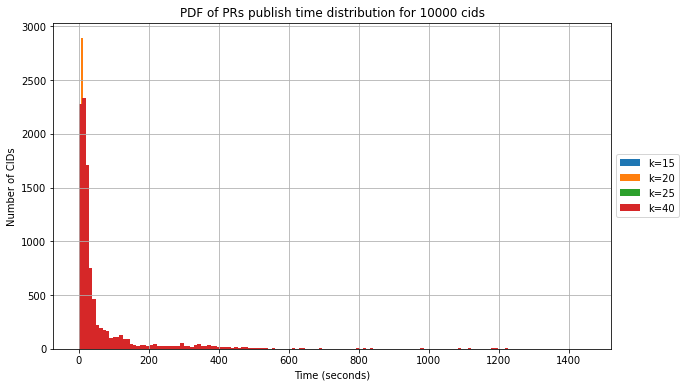

In [8]:
# Comparison of the DHT_Provide times PDF

fig, ax = plt.subplots()

# Iter through DBs
for i, con in enumerate(dbs):
    pobj = pd.read_sql_query("select provide_time from cid_info order by provide_time ASC", con)
    pobj['provide_time'] = pobj['provide_time'] / 1000  # convert to secods
    
    ax.hist(pobj['provide_time'], density=False, bins=150, label=db_labels[i])

plt.title(f'PDF of PRs publish time distribution for {len(pobj)} cids')
plt.xlabel("Time (seconds)")
plt.ylabel(f"Number of CIDs")

# Legend
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid()

k=20
0.05     2.97185
0.25     7.01675
0.50    12.64300
0.75    23.33600
0.90    48.98590
Name: provide_time, dtype: float64
k=20_no_hydras
0.05     2.50780
0.25     7.25850
0.50    13.91150
0.75    25.39325
0.90    55.09600
Name: provide_time, dtype: float64


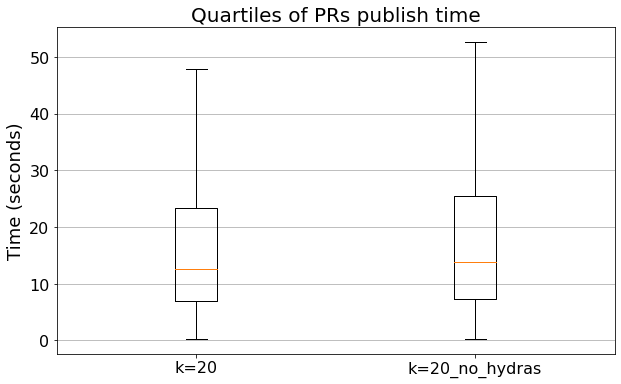

In [48]:
# Comparison of the DHT_Provide times Quartiles

time_dists = []

# Make PostgreSQL query at each of the DB connetions
for i, con in enumerate(dbs):
    pobj = pd.read_sql_query("select provide_time from cid_info order by provide_time ASC", con)
    pobj['provide_time'] = pobj['provide_time'] / 1000  # convert to secods
    time_dists.append(pobj['provide_time'].to_numpy())
    print(db_labels[i])
    print(pobj['provide_time'].quantile([0.05,0.25,0.5,0.75, 0.90]))
    
plt.boxplot(time_dists, showfliers=False)

plt.title(f'Quartiles of PRs publish time', fontsize=20)
plt.ylabel(f"Time (seconds)", fontsize=18)
plt.xticks(box_idxs+1, db_labels)

plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16)

plt.grid(axis='y')


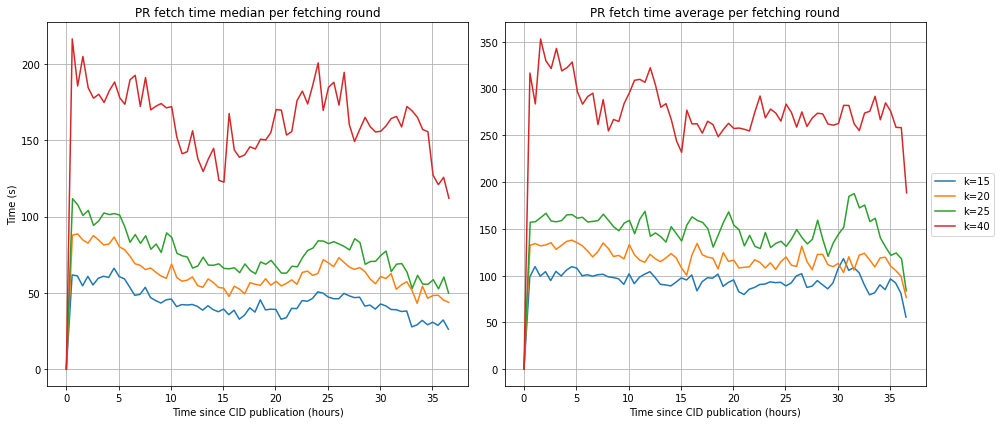

In [10]:
# Compare the time to ping PR Holders

# Get the number of rounds that we hoarded
pings = pd.read_sql_query("select ping_round from fetch_results group by ping_round order by ping_round ASC", dbs[0])

fig, (ax_means, ax_avgs) = plt.subplots(1,2, figsize=(14,6))

# Iter through DBs
for i, con in enumerate(dbs):
    m_dist = []
    a_dist = []
    
    # Get the CID Publish times for the CIDs
    pub_times = pd.read_sql_query("""
        select cid_hash, gen_time from cid_info order by cid_hash;
        """, con)
    
    hours_since_pub = []
    # Get the distribution for each of the rounds
    for idx, row in pings.iterrows():
        
        fpd_round_ftime = pd.read_sql_query(f'select cid_hash, fetch_time, fetch_duration from fetch_results where ping_round={row["ping_round"]} order by cid_hash', con) 
        fpd_round_ftime['fetch_duration'] = fpd_round_ftime['fetch_duration'] / 1000 # to seconds 
        m_dist.append(fpd_round_ftime['fetch_duration'].median())
        a_dist.append(fpd_round_ftime['fetch_duration'].mean())
    
        # calculate the time at wich each ping round was done
        fpd_round_ftime['time of pub'] = (fpd_round_ftime['fetch_time'] - pub_times['gen_time']) / 3600 # get the hours since publish time
        pp = fpd_round_ftime['time of pub'].to_numpy()
        hours_since_pub.append(np.median(pp))
    
    ax_means.plot(hours_since_pub, m_dist, label=db_labels[i])
    ax_avgs.plot(hours_since_pub, a_dist, label=db_labels[i])

# mean
ax_means.set_xlabel("Time since CID publication (hours)")
ax_means.set_ylabel("Time (s)")
ax_means.set_title("PR fetch time median per fetching round")
ax_means.grid()

# avgs
ax_avgs.set_xlabel("Time since CID publication (hours)")
ax_avgs.set_title("PR fetch time average per fetching round")
ax_avgs.grid()

ax_avgs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

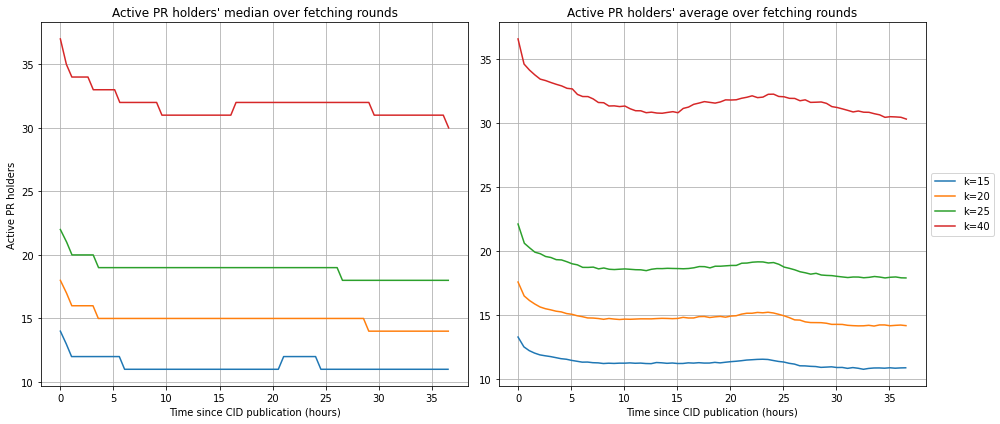

In [11]:
# Compare active PR holders over fetch rounds (just for double check following distributions)

# Get the number of rounds that we hoarded
pings = pd.read_sql_query("select ping_round from fetch_results group by ping_round order by ping_round ASC", dbs[0])

fig, (ax_means, ax_avgs) = plt.subplots(1,2, figsize=(14,6))


# Iter through DBs
for i, con in enumerate(dbs):
    m_dist = []
    a_dist = []
    
    # Get the CID Publish times for the CIDs
    pub_times = pd.read_sql_query("""
        select cid_hash, gen_time from cid_info order by cid_hash;
        """, con)
    
    hours_since_pub = []
    # Get the distribution for each of the rounds
    for idx, row in pings.iterrows():
        p = pd.read_sql_query(f'select cid_hash, fetch_time, success_att from fetch_results where ping_round={row["ping_round"]} order by cid_hash', con) 
        m_dist.append(p['success_att'].median())
        a_dist.append(p['success_att'].mean())
        
        # calculate the time at wich each ping round was done
        p['time of pub'] = (p['fetch_time'] - pub_times['gen_time']) / 3600 # get the hours since publish time
        pp = p['time of pub'].to_numpy()
        hours_since_pub.append(np.median(pp))
    
    ax_means.plot(hours_since_pub, m_dist, label=db_labels[i])
    ax_avgs.plot(hours_since_pub, a_dist, label=db_labels[i])

# mean
ax_means.set_xlabel("Time since CID publication (hours)")
ax_means.set_ylabel("Active PR holders")
ax_means.set_title("Active PR holders' median over fetching rounds")
ax_means.grid()

# avgs
ax_avgs.set_xlabel("Time since CID publication (hours)")
ax_avgs.set_title("Active PR holders' average over fetching rounds")
ax_avgs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax_avgs.grid()

plt.tight_layout()
plt.show()


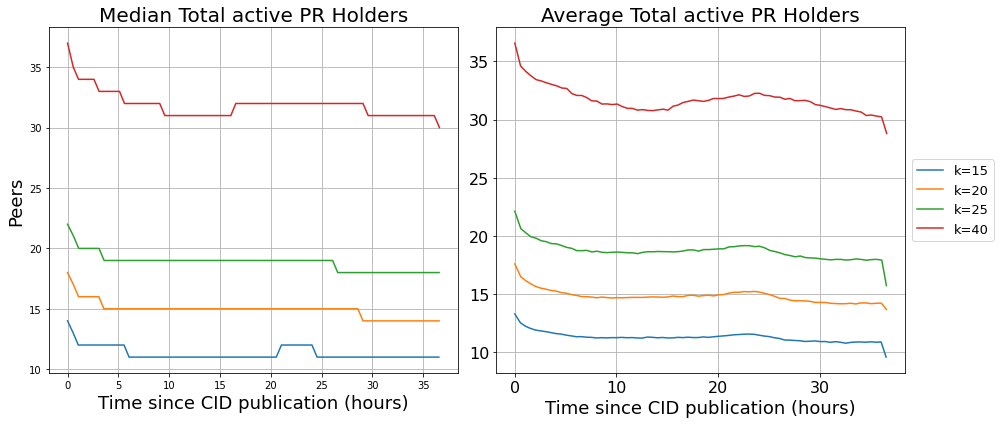

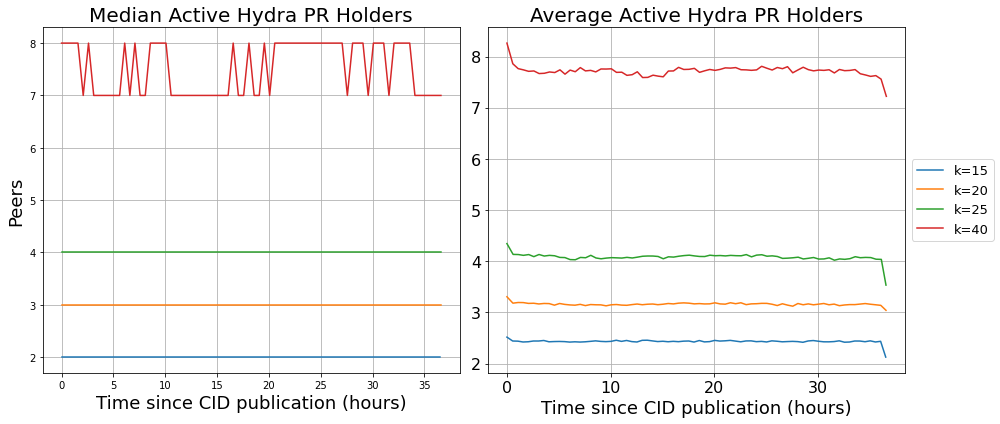

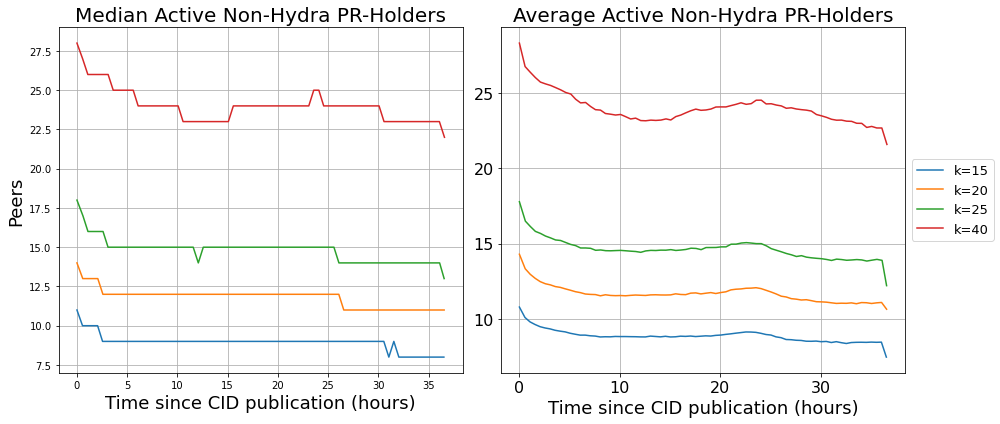

In [32]:
# Compare Active PR holders active fetch rounds total - hydra peers - non-hydra peers
# NOTE: might take serveral minutes to fetch all the data from the DB

# Get the number of rounds that we hoarded
pings = pd.read_sql_query("select ping_round from fetch_results group by ping_round order by ping_round ASC", dbs[0])


query_set = [
   """
   select p.cid_hash, p.ping_round, count(p.is_active) from (
       select r.cid_hash, r.ping_round, r.peer_id, r.is_active from ping_results as r
           left join peer_info as i on r.peer_id=i.peer_id    
   ) as p where p.ping_round={%ping_round%} and p.is_active=true 
   group by p.cid_hash, p.ping_round order by cid_hash;
   """,
   """
   select p.cid_hash, p.ping_round, count(p.is_active) from (
       select r.cid_hash, r.ping_round, r.peer_id, r.is_active, i.client from ping_results as r
       left join peer_info as i on r.peer_id=i.peer_id    
   ) as p where p.ping_round={%ping_round%} and p.is_active=true and p.client='hydra-booster'
   group by p.cid_hash, p.ping_round order by cid_hash;
   """,
    """
    select p.cid_hash, p.ping_round, count(p.is_active) from (
        select r.cid_hash, r.ping_round, r.peer_id, r.is_active, i.client from ping_results as r
        left join peer_info as i on r.peer_id=i.peer_id    
    ) as p where p.ping_round={%ping_round%} and p.is_active=true and p.client!='hydra-booster'
    group by p.cid_hash, p.ping_round order by cid_hash;
    """,
]
title_set = [
    "Total active PR Holders", 
    "Active Hydra PR Holders", 
    "Active Non-Hydra PR-Holders"]


for item, query_item in enumerate(query_set):
    
    fig, (ax_m, ax_a) = plt.subplots(1, 2, figsize=(14,6))
    
    # Iter through DBs
    for i, con in enumerate(dbs):
        m_dist = []
        a_dist = []
                    
            
        cids = pd.read_sql_query("""select cid_hash from cid_info;""", con)    
            
        # Get the CID Publish times for the CIDs
        pub_times = pd.read_sql_query("""
            select cid_hash, gen_time from cid_info order by cid_hash;
            """, con)
    
        hours_since_pub = []
        # Iterate through ping rounds to get 
        for idx, row in pings.iterrows():
            
            # Calculate the time of pinging each round (to display it hours since publicatoin)
            fetch_round = pd.read_sql_query(f"""
            select cid_hash, fetch_time from fetch_results where ping_round={row['ping_round']} order by cid_hash;
            """, con)
            
            active_p = pd.read_sql_query( query_item.replace('{%ping_round%}', str(row['ping_round'])), con)
            act_dist = active_p['count'].to_numpy()
            # Add zeros for those cids that don't have active peers in any round
            for j in range(len(cids)-len(act_dist)):
                act_dist = np.append(act_dist, 0)
            if len(cids) > len(act_dist):
                print(len(cids),len(act_dist))
            m_dist.append(np.median(act_dist))
            a_dist.append(np.mean(act_dist))

            # calculate the time at wich each ping round was done
            fetch_round['time of pub'] = (fetch_round['fetch_time'] - pub_times['gen_time']) / 3600 # get the hours since publish time
            pp = fetch_round['time of pub'].to_numpy()
            hours_since_pub.append(np.median(pp))
        
        ax_m.plot(hours_since_pub, m_dist, label=db_labels[i])
        ax_a.plot(hours_since_pub, a_dist, label=db_labels[i])
        
    # active hydras vs active no hydras
    # mean
    ax_m.set_title('Median '+title_set[item], fontsize=20)
    ax_m.set_xlabel("Time since CID publication (hours)", fontsize=18)
    ax_m.set_ylabel("Peers", fontsize=18)
    ax_m.grid()

    # avg
    ax_a.set_title('Average '+title_set[item], fontsize=20)
    ax_a.set_xlabel("Time since CID publication (hours)", fontsize=18)
    ax_a.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 13})
    ax_a.grid()
    
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.tick_params(axis='y', which='major', labelsize=16)

    plt.tight_layout()
    plt.show()

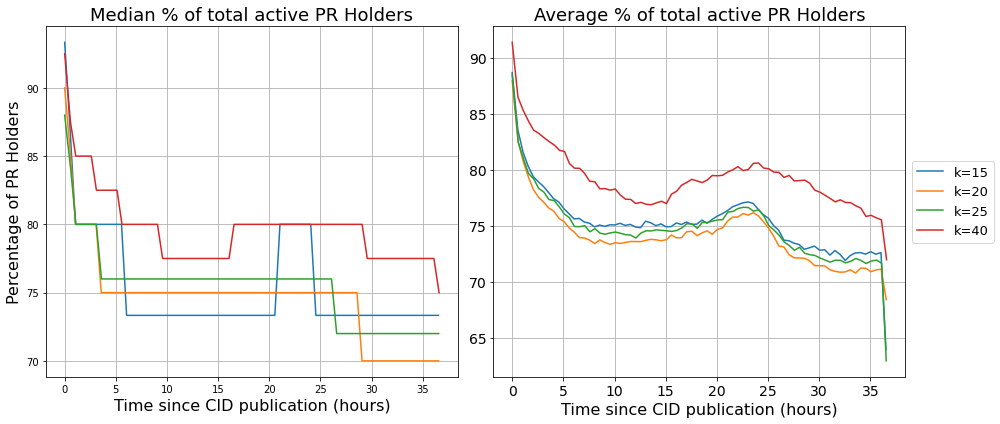

KeyboardInterrupt: 

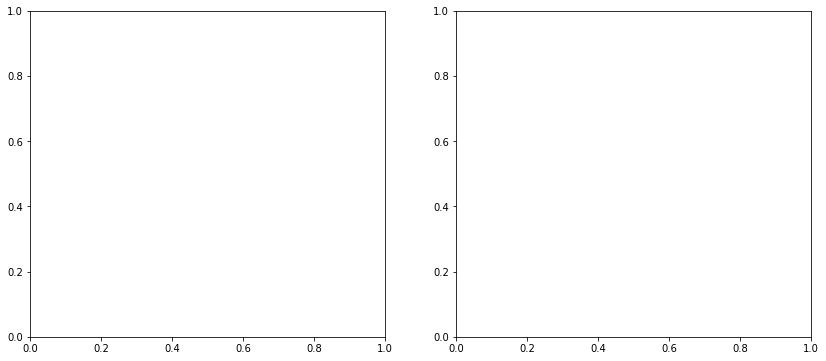

In [45]:
# Compare Active PR holders active fetch rounds total - hydra peers - non-hydra peers (PERCENTAGES)
# NOTE: might take serveral minutes to fetch all the data from the DB

# Get the number of rounds that we hoarded
pings = pd.read_sql_query("select ping_round from fetch_results group by ping_round order by ping_round ASC", dbs[0])


query_set = [
   """
   select p.cid_hash, p.ping_round, count(p.is_active) from (
       select r.cid_hash, r.ping_round, r.peer_id, r.is_active from ping_results as r
           left join peer_info as i on r.peer_id=i.peer_id    
   ) as p where p.ping_round={%ping_round%} and p.is_active=true 
   group by p.cid_hash, p.ping_round order by cid_hash;
   """,
   """
   select p.cid_hash, p.ping_round, count(p.is_active) from (
       select r.cid_hash, r.ping_round, r.peer_id, r.is_active, i.client from ping_results as r
       left join peer_info as i on r.peer_id=i.peer_id    
   ) as p where p.ping_round={%ping_round%} and p.is_active=true and p.client='hydra-booster'
   group by p.cid_hash, p.ping_round order by cid_hash;
   """,
    """
    select p.cid_hash, p.ping_round, count(p.is_active) from (
        select r.cid_hash, r.ping_round, r.peer_id, r.is_active, i.client from ping_results as r
        left join peer_info as i on r.peer_id=i.peer_id    
    ) as p where p.ping_round={%ping_round%} and p.is_active=true and p.client!='hydra-booster'
    group by p.cid_hash, p.ping_round order by cid_hash;
    """,
]
title_set = [
    "% of total active PR Holders", 
    "% of active Hydra PR Holders", 
    "% of active Non-Hydra PR-Holders"]


for item, query_item in enumerate(query_set):
    
    fig, (ax_m, ax_a) = plt.subplots(1, 2, figsize=(14,6))
    
    # Iter through DBs
    for i, con in enumerate(dbs):
        m_dist = []
        a_dist = []
                    
            
        cids = pd.read_sql_query("""select cid_hash from cid_info;""", con)    
            
        # Get the CID Publish times for the CIDs
        pub_times = pd.read_sql_query("""
            select cid_hash, gen_time from cid_info order by cid_hash;
            """, con)
    
        hours_since_pub = []
        
        max_value = 0
        # get the max value by checking the K value of the first CID
        k = pd.read_sql_query("select k, count(k) from cid_info group by k;", con)
        max_value = max(k["k"])
        
        # Iterate through ping rounds to get 
        for idx, row in pings.iterrows():
            
            # Calculate the time of pinging each round (to display it hours since publicatoin)
            fetch_round = pd.read_sql_query(f"""
            select cid_hash, fetch_time from fetch_results where ping_round={row['ping_round']} order by cid_hash;
            """, con)
            
            active_p = pd.read_sql_query( query_item.replace('{%ping_round%}', str(row['ping_round'])), con)
                           
            active_p["%"] = (active_p['count'] / max_value) * 100
            act_dist = active_p['%'].to_numpy()
            # Add zeros for those cids that don't have active peers in any round
            for j in range(len(cids)-len(act_dist)):
                act_dist = np.append(act_dist, 0)
            if len(cids) > len(act_dist):
                print(len(cids),len(act_dist))
            m_dist.append(np.median(act_dist))
            a_dist.append(np.mean(act_dist))

            # calculate the time at wich each ping round was done
            fetch_round['time of pub'] = (fetch_round['fetch_time'] - pub_times['gen_time']) / 3600 # get the hours since publish time
            pp = fetch_round['time of pub'].to_numpy()
            hours_since_pub.append(np.median(pp))
        
        ax_m.plot(hours_since_pub, m_dist, label=db_labels[i])
        ax_a.plot(hours_since_pub, a_dist, label=db_labels[i])
        
    # active hydras vs active no hydras
    # mean
    ax_m.set_title('Median '+title_set[item], fontsize=18)
    ax_m.set_xlabel("Time since CID publication (hours)", fontsize=16)
    ax_m.set_ylabel("Percentage of PR Holders", fontsize=16)
    ax_m.grid()
    
    


    # avg
    ax_a.set_title('Average '+title_set[item], fontsize=18)
    ax_a.set_xlabel("Time since CID publication (hours)", fontsize=16)
    ax_a.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 13})
    ax_a.grid()
    
    plt.tick_params(axis='x', which='major', labelsize=14)
    plt.tick_params(axis='y', which='major', labelsize=14)
    
    plt.tight_layout()
    plt.show()

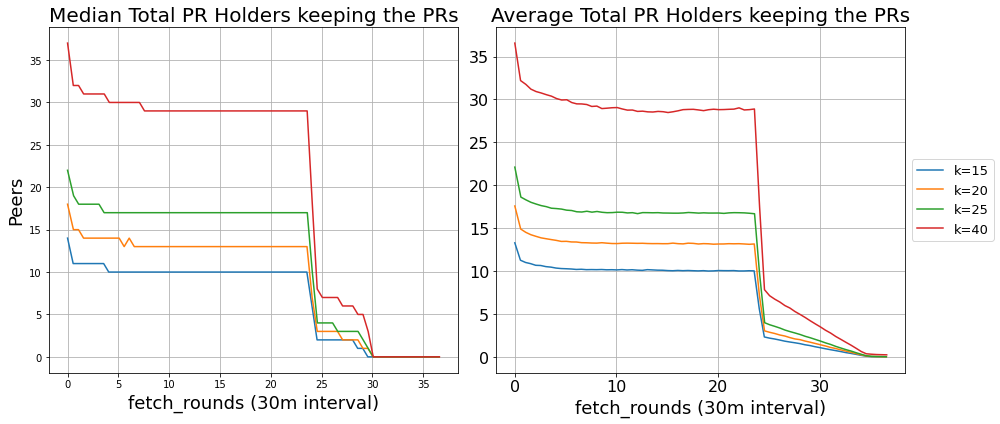

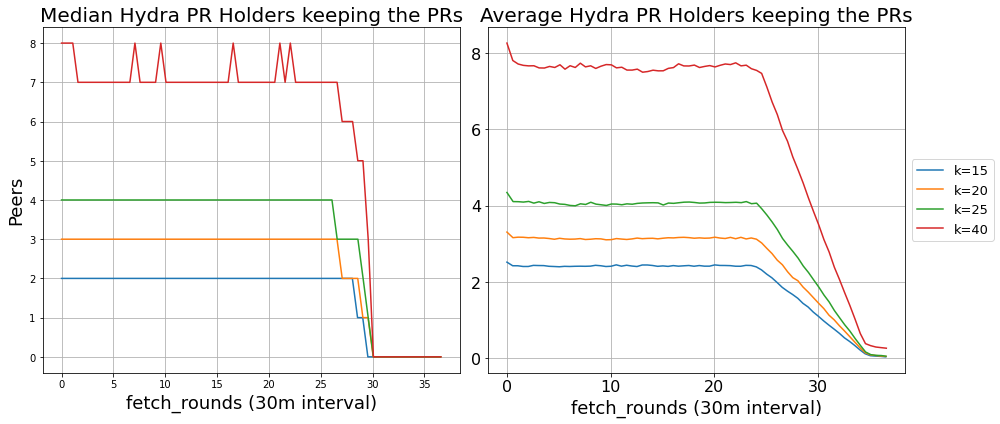

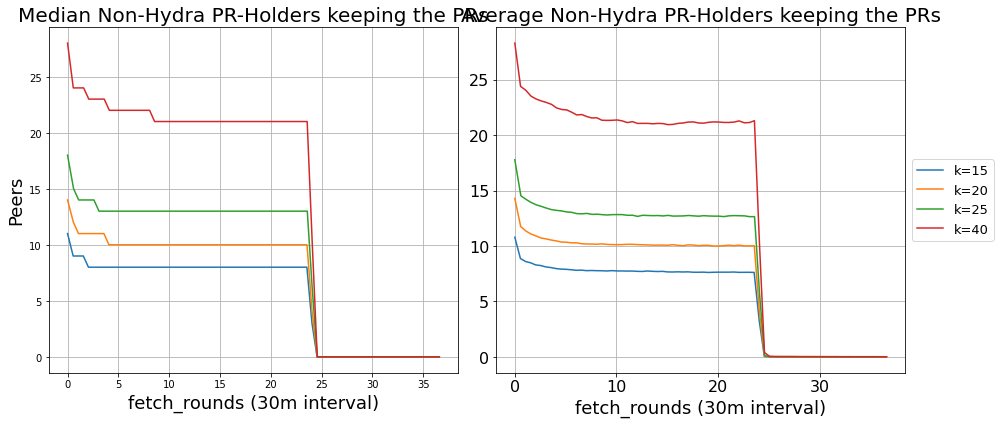

In [34]:
# Compare Active PR holders over fetch rounds total - hydra peers - non-hydra peers

# Get the number of rounds that we hoarded
pings = pd.read_sql_query("select ping_round from fetch_results group by ping_round order by ping_round ASC", dbs[0])

query_set = ["""
    select p.cid_hash, p.ping_round, count(p.has_records) from (
        select r.cid_hash, r.ping_round, r.peer_id, r.has_records from ping_results as r
            left join peer_info as i on r.peer_id=i.peer_id    
    ) as p where p.ping_round={%ping_round%} and p.has_records=true 
    group by p.cid_hash, p.ping_round order by cid_hash;
    """,
    """
    select p.cid_hash, p.ping_round, count(p.has_records) from (
        select r.cid_hash, r.ping_round, r.peer_id, r.has_records, i.client from ping_results as r
        left join peer_info as i on r.peer_id=i.peer_id    
    ) as p where p.ping_round={%ping_round%} and p.has_records=true and p.client='hydra-booster'
    group by p.cid_hash, p.ping_round order by cid_hash;
    """,
    """
    select p.cid_hash, p.ping_round, count(p.has_records) from (
        select r.cid_hash, r.ping_round, r.peer_id, r.has_records, i.client from ping_results as r
        left join peer_info as i on r.peer_id=i.peer_id    
    ) as p where p.ping_round={%ping_round%} and p.has_records=true and p.client!='hydra-booster'
    group by p.cid_hash, p.ping_round order by cid_hash;
    """,
]

title_set = [
    "Total PR Holders keeping the PRs", 
    "Hydra PR Holders keeping the PRs", 
    "Non-Hydra PR-Holders keeping the PRs"]

for item, query_item in enumerate(query_set):
    
    fig, (ax_m, ax_a) = plt.subplots(1, 2)
    
    # Iter through DBs for each query
    for i, con in enumerate(dbs):
        m_dist = []
        a_dist = []
        
        cids = pd.read_sql_query("""select cid_hash from cid_info;""", con)    

        
        # Get the CID Publish times for the CIDs
        pub_times = pd.read_sql_query("""
            select cid_hash, gen_time from cid_info order by cid_hash;
            """, con)
        
        hours_dist = []
        
        # Iterate through ping rounds to get 
        for idx, row in pings.iterrows():
            active_p = pd.read_sql_query( query_item.replace('{%ping_round%}', str(row['ping_round'])), con)
            act_dist = active_p['count'].to_numpy()
            # Add zeros for those cids that don't have active peers in any round
            for j in range(len(cids)-len(act_dist)):
                act_dist = np.append(act_dist, 0)
            
            if len(cids) > len(act_dist):
                print(len(cids),len(act_dist))
                
            m_dist.append(np.median(act_dist))
            a_dist.append(np.mean(act_dist))
            
            # Calculate the time of pinging each round (to display it hours since publicatoin)
            fetch_round = pd.read_sql_query(f"""
            select cid_hash, fetch_time from fetch_results where ping_round={row['ping_round']} order by cid_hash;
            """, con)
            
            # calculate the time at wich each ping round was done
            fetch_round['time of pub'] = (fetch_round['fetch_time'] - pub_times['gen_time']) / 3600 # get the hours since publish time
            pp = fetch_round['time of pub'].to_numpy()
            hours_dist.append(np.median(pp))
        
        ax_m.plot(hours_dist, m_dist, label=db_labels[i])
        ax_a.plot(hours_dist, a_dist, label=db_labels[i])

    # active hydras vs active no hydras
    # mean
    ax_m.set_title('Median '+title_set[item], fontsize=20)
    ax_m.set_xlabel("fetch_rounds (30m interval)", fontsize=18) # TODO: hardcoded to 30 mins
    ax_m.set_ylabel("Peers", fontsize=18)
    ax.set_ylim(-1, 26)
    ax_m.figure.set_size_inches(14,6)
    ax_m.grid()

    # avg
    ax_a.set_title('Average '+title_set[item], fontsize=20)
    ax_a.set_xlabel("fetch_rounds (30m interval)", fontsize=18) # TODO: hardcoded to 30 mins
    ax_a.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 13})
    ax.set_ylim(-1, 26)
    ax_a.figure.set_size_inches(14,6)
    ax_a.grid()
    
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.tick_params(axis='y', which='major', labelsize=16)
    
    plt.tight_layout()
    plt.show()


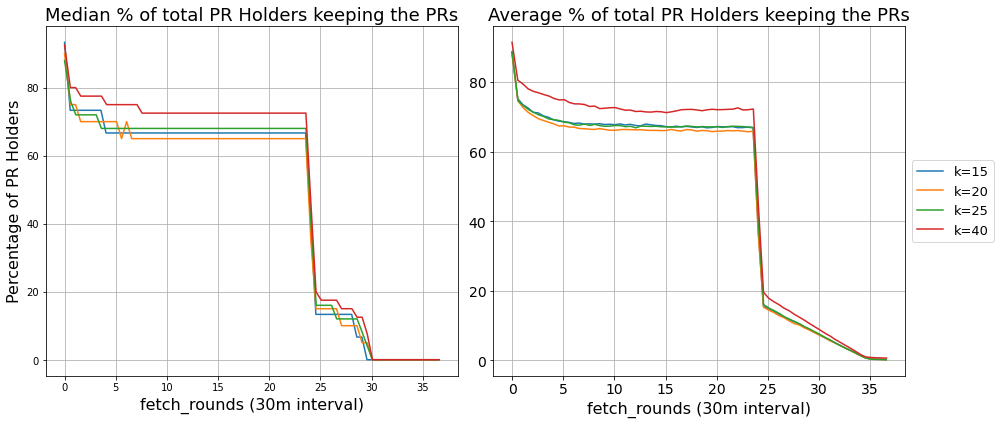

KeyboardInterrupt: 

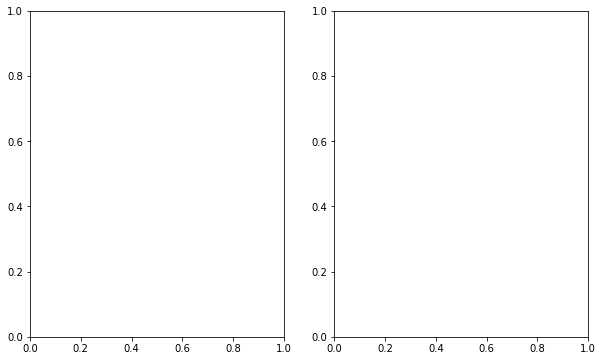

In [46]:
# Compare Active PR holders over fetch rounds total - hydra peers - non-hydra peers (PERCENTAGES)

# Get the number of rounds that we hoarded
pings = pd.read_sql_query("select ping_round from fetch_results group by ping_round order by ping_round ASC", dbs[0])

query_set = ["""
    select p.cid_hash, p.ping_round, count(p.has_records) from (
        select r.cid_hash, r.ping_round, r.peer_id, r.has_records from ping_results as r
            left join peer_info as i on r.peer_id=i.peer_id    
    ) as p where p.ping_round={%ping_round%} and p.has_records=true 
    group by p.cid_hash, p.ping_round order by cid_hash;
    """,
    """
    select p.cid_hash, p.ping_round, count(p.has_records) from (
        select r.cid_hash, r.ping_round, r.peer_id, r.has_records, i.client from ping_results as r
        left join peer_info as i on r.peer_id=i.peer_id    
    ) as p where p.ping_round={%ping_round%} and p.has_records=true and p.client='hydra-booster'
    group by p.cid_hash, p.ping_round order by cid_hash;
    """,
    """
    select p.cid_hash, p.ping_round, count(p.has_records) from (
        select r.cid_hash, r.ping_round, r.peer_id, r.has_records, i.client from ping_results as r
        left join peer_info as i on r.peer_id=i.peer_id    
    ) as p where p.ping_round={%ping_round%} and p.has_records=true and p.client!='hydra-booster'
    group by p.cid_hash, p.ping_round order by cid_hash;
    """,
]

title_set = [
    "% of total PR Holders keeping the PRs", 
    "% of total Hydra PR Holders keeping the PRs", 
    "% of Non-Hydra PR-Holders keeping the PRs"]

for item, query_item in enumerate(query_set):
    
    fig, (ax_m, ax_a) = plt.subplots(1, 2)
    
    # Iter through DBs for each query
    for i, con in enumerate(dbs):
        m_dist = []
        a_dist = []
        
        cids = pd.read_sql_query("""select cid_hash from cid_info;""", con)    

        
        # Get the CID Publish times for the CIDs
        pub_times = pd.read_sql_query("""
            select cid_hash, gen_time from cid_info order by cid_hash;
            """, con)
        
        hours_dist = []
        
        max_value = 0
        # get the max value by checking the K value of the first CID
        k = pd.read_sql_query("select k, count(k) from cid_info group by k;", con)
        max_value = max(k["k"])
        
        # Iterate through ping rounds to get 
        for idx, row in pings.iterrows():
            active_p = pd.read_sql_query( query_item.replace('{%ping_round%}', str(row['ping_round'])), con)
                            
            active_p["%"] = (active_p['count'] / max_value) * 100
            act_dist = active_p['%'].to_numpy()
            
            # Add zeros for those cids that don't have active peers in any round
            for j in range(len(cids)-len(act_dist)):
                act_dist = np.append(act_dist, 0)
            
            if len(cids) > len(act_dist):
                print(len(cids),len(act_dist))
                
            m_dist.append(np.median(act_dist))
            a_dist.append(np.mean(act_dist))
            
            # Calculate the time of pinging each round (to display it hours since publicatoin)
            fetch_round = pd.read_sql_query(f"""
            select cid_hash, fetch_time from fetch_results where ping_round={row['ping_round']} order by cid_hash;
            """, con)
            
            # calculate the time at wich each ping round was done
            fetch_round['time of pub'] = (fetch_round['fetch_time'] - pub_times['gen_time']) / 3600 # get the hours since publish time
            pp = fetch_round['time of pub'].to_numpy()
            hours_dist.append(np.median(pp))
        
        ax_m.plot(hours_dist, m_dist, label=db_labels[i])
        ax_a.plot(hours_dist, a_dist, label=db_labels[i])

    # active hydras vs active no hydras
    # mean
    ax_m.set_title('Median '+title_set[item], fontsize=18)
    ax_m.set_xlabel("fetch_rounds (30m interval)", fontsize=16) # TODO: hardcoded to 30 mins
    ax_m.set_ylabel("Percentage of PR Holders", fontsize=16)
    ax.set_ylim(-1, 26)
    ax_m.figure.set_size_inches(14,6)
    ax_m.grid()

    # avg
    ax_a.set_title('Average '+title_set[item], fontsize=18)
    ax_a.set_xlabel("fetch_rounds (30m interval)", fontsize=16) # TODO: hardcoded to 30 mins
    ax_a.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 13})
    ax.set_ylim(-1, 26)
    ax_a.figure.set_size_inches(14,6)
    ax_a.grid()
    
    plt.tick_params(axis='x', which='major', labelsize=14)
    plt.tick_params(axis='y', which='major', labelsize=14)

    plt.tight_layout()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


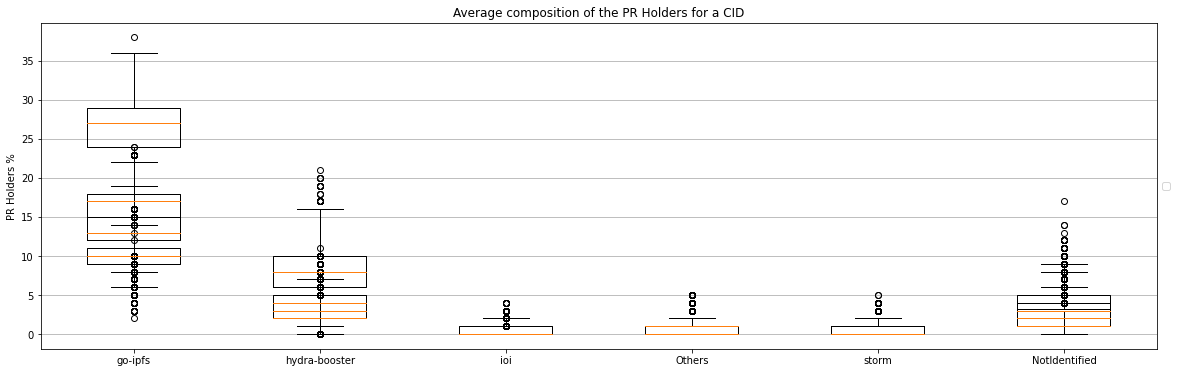

In [41]:
# Get the actual distribution of client-agents in the PR Holders for the CIDs 


# get the whole list a clients
clients = pd.read_sql_query(f"""
    select client from peer_info group by client;
    """, dbs[-1])

fig, ax = plt.subplots(figsize=(20,6))

width = 0.15    
    
# Iter through DBs
for i, con in enumerate(dbs):
    
    # local dist of clients
    cli_dist = {}
    for idx, row in clients.iterrows():
        cli_dist[row['client']] = []
    
    cids = pd.read_sql_query("select cid_hash from cid_info order by cid_hash ASC;", con)
    print()
    # get each of the cid and keep the distributions
    for idx, row in cids.iterrows():
        prs = pd.read_sql_query(f"""
        select a.cid_hash, a.client, count(a.client) from (select c.cid_hash, c.peer_id, p.client from pr_holders as c
        left join peer_info as p on c.peer_id = p.peer_id 
        where c.cid_hash='{row['cid_hash']}') as a
        group by a.cid_hash, a.client order by a.client;
        """, con)

        cach = {}
        for idx, row in clients.iterrows():
            cach[row['client']] = 0

        # add new distribution of 
        for i, r in prs.iterrows():
            # keep the dist
            cach[r['client']] = r['count']

        for c in cach:
            cli_dist[c].append(cach[c])

    ax.boxplot(cli_dist.values())
    ax.set_xticks(np.arange(len(cli_dist))+1, cli_dist.keys())




"""
fig, ax = plt.subplots(figsize=(20,6))

width = 0.15

# Iter through DBs
for i, con in enumerate(dbs):
    pobj = pd.read_sql_query("select client, count(client) from peer_info group by client order by count(client) DESC;", con)

    total = 0
    for idx, c in pobj.iterrows():
        total += c["count"]

    # get the percentage of each client
    pobj["client_ratio"] = (pobj["count"] * 100) / cid_number

    # compose labels
    labels = []
    for idx, row in pobj.iterrows():
        r = f'{row["client_ratio"]}% {row["client"]}'
        labels.append(r)

    ax.bar(np.arange(len(pobj['client']))+(width*i), pobj['client_ratio'], width, label=db_labels[i])
    ax.set_xticks(np.arange(len(pobj['client'])), pobj['client'])
"""

plt.title("Average composition of the PR Holders for a CID")
plt.ylabel("PR Holders %")
plt.legend()
plt.legend(loc='center left',  bbox_to_anchor=(1, 0.5))
plt.grid(axis='y')

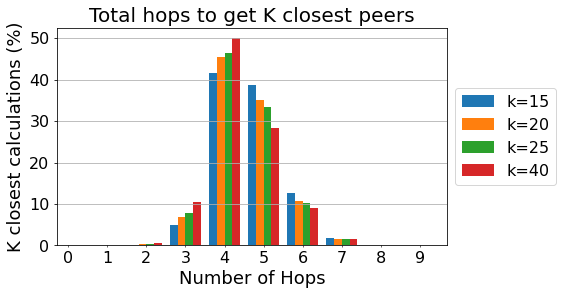

In [47]:
# Compare number of hops recorded for all the datasets

# 1. Compose the total hops comparison
fig, ax = plt.subplots(figsize=(7,4))

width = 0.2

# Iter through DBs
for i, con in enumerate(dbs):
    hops_obj = pd.read_sql_query("""
    select total_hops, count(total_hops) from fetch_results group by total_hops order by total_hops ASC;
    """, con)

    # get total
    tot_hops = hops_obj["count"].sum()

    hops_obj["%"] = (hops_obj["count"]/tot_hops)*100

    # compose labels
    labels = []
    for idx, row in hops_obj.iterrows():
        r = f'{row["%"]}% {row["total_hops"]}'
        labels.append(r)

    ax.bar(hops_obj['total_hops']+(width*i), hops_obj['%'], width, label=db_labels[i])

    t = np.arange(0, 10, 1)
    t_p = t+0.3
    
    ax.set_xticks([])
    ax.set_xticks(t_p, minor=True)
    ax.set_xticklabels(t, minor=True, fontsize=16)
    
    ax.set_xlim(0, 10)
    
plt.title("Total hops to get K closest peers", fontsize=20)
plt.ylabel("K closest calculations (%)", fontsize=18)
plt.xlabel("Number of Hops", fontsize=18)
plt.legend()
plt.legend(loc='center left',  bbox_to_anchor=(1, 0.5), prop={'size': 16})

plt.tick_params(axis='y', which='major', labelsize=16)
plt.grid(axis='y')
plt.show()


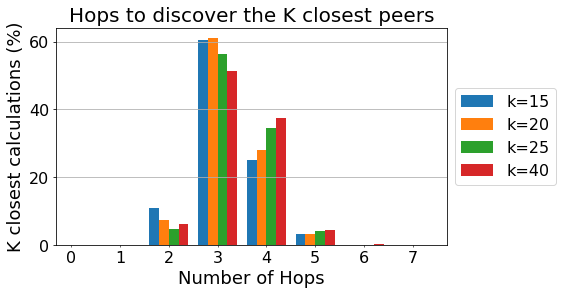

In [54]:
# 2. Compose the number of hops to discover the closest peers
fig, ax = plt.subplots(figsize=(7,4))

width = 0.2

# Iter through DBs
for i, con in enumerate(dbs):
    hops_obj = pd.read_sql_query("""
    select hops_for_closest, count(hops_for_closest) from fetch_results group by hops_for_closest order by hops_for_closest ASC;
    """, con)

    # get total
    tot_hops = hops_obj["count"].sum()

    hops_obj["%"] = (hops_obj["count"]/tot_hops)*100

    # compose labels
    labels = []
    for idx, row in hops_obj.iterrows():
        r = f'{row["%"]}% {row["hops_for_closest"]}'
        labels.append(r)

    ax.bar(hops_obj['hops_for_closest']+(width*i), hops_obj['%'], width, label=db_labels[i])
    t = np.arange(0, 8, 1)
    t_p = t+0.3
    
    ax.set_xticks([])
    ax.set_xticks(t_p, minor=True)
    ax.set_xticklabels(t, minor=True, fontsize=16)
    
    ax.set_xlim(0, 8) 
    
plt.title("Hops to discover the K closest peers", fontsize=20)
plt.ylabel("K closest calculations (%)", fontsize=18)
plt.xlabel("Number of Hops", fontsize=18)
plt.legend()
plt.legend(loc='center left',  bbox_to_anchor=(1, 0.5), prop={'size': 16})
plt.tick_params(axis='y', which='major', labelsize=16)
plt.grid(axis='y')
plt.show()


db 1/4
db 2/4
db 3/4
db 4/4


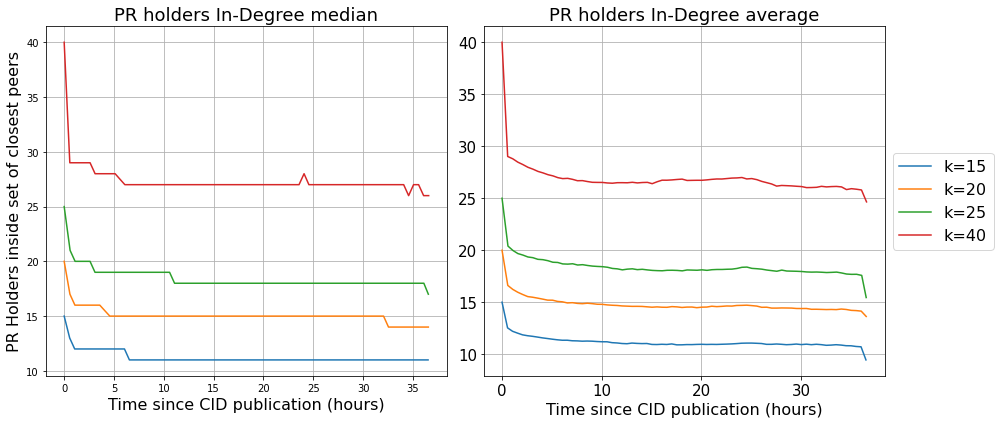

In [42]:
# Compare the in-degree ratio of PR Holders in K closest peers over fetch rations 
# NOTE: might take several minutes depending on the number of DBs, fetch_rounds and k value

# Formula to compute the in_degree on a PR Holder set into a given K_closest peers set
def get_in_degree(org, new) -> int:
    in_degree = 0
    for new_peer in new:
        if new_peer in org:
            in_degree += 1
    return in_degree

# Get the ping rounds
ping_rounds = pd.read_sql_query("""select ping_round from fetch_results group by ping_round order by ping_round ASC;""", dbs[0])

fig, (ax_m, ax_a) = plt.subplots(1,2, figsize=(14,6))

# Iterate over the existing DBs
for idx, con in enumerate(dbs):
    print(f"db {idx+1}/{len(dbs)}")
    m_dist = []
    a_dist = []
    
    # Get the CID Publish times for the CIDs
    pub_times = pd.read_sql_query("""
        select cid_hash, gen_time from cid_info order by cid_hash;
        """, con)
    
    hours_since_pub = []
    hours_since_pub.append(0)
    
    # Get PR Holders for each CID
    pr_holders = pd.read_sql_query("""select cid_hash, peer_id from pr_holders order by cid_hash;""", con)

    init_holders = {}
    for i, r in pr_holders.iterrows():
        if r['cid_hash'] not in init_holders:
            init_holders[r['cid_hash']] = []
        init_holders[r['cid_hash']].append(r['peer_id'])

    init_in_degree = []
    
    # Get in-degree of the first round - should give 10/10 
    for cid in init_holders:
        in_d = get_in_degree(init_holders[cid], init_holders[cid])
        init_in_degree.append(in_d)

    m_dist.append(np.median(init_in_degree))
    a_dist.append(np.median(init_in_degree))

    for i, r in ping_rounds.iterrows():
        if r['ping_round'] == 0: # first round has no closest peers
            continue
            
        # Calculate the time of pinging each round (to display it hours since publicatoin)
        fetch_round = pd.read_sql_query(f"""
        select cid_hash, fetch_time, fetch_duration from fetch_results where ping_round={r['ping_round']} order by cid_hash;
        """, con)
        
        fetch_round['time of pub'] = (fetch_round['fetch_time'] - pub_times['gen_time']) / 3600 # get the hours since publish time
        pp = fetch_round['time of pub'].to_numpy()
        hours_since_pub.append(np.median(pp))
        
        round_close_peers = {}
        close_peers = pd.read_sql_query(f"""
        select cid_hash, peer_id from k_closest_peers where ping_round={r['ping_round']} order by cid_hash;
        """, con)

        # Filter out the K closest peers by CID
        for i, r in close_peers.iterrows():
            if r['cid_hash'] not in round_close_peers:
                round_close_peers[r['cid_hash']] = []

            round_close_peers[r['cid_hash']].append(r['peer_id'])

        # Get the in-degree of the PR Holders and the rounds of K closest peers
        round_close_p_dist = []
        for c in init_holders:
            in_d = 0
            try:
                in_d = get_in_degree(init_holders[c], round_close_peers[c])    
            except:
                in_d = 0
            round_close_p_dist.append(in_d) 
       
        m_dist.append(np.median(round_close_p_dist))
        a_dist.append(np.mean(round_close_p_dist))
    
    ax_m.plot(hours_since_pub, m_dist, label=db_labels[idx])
    ax_a.plot(hours_since_pub, a_dist, label=db_labels[idx])

# mean
ax_m.set_title('PR holders In-Degree median', fontsize=18)
ax_m.set_xlabel("Time since CID publication (hours)", fontsize=16)
ax_m.set_ylabel("PR Holders inside set of closest peers", fontsize=16)
ax_m.grid()

# avg
ax_a.set_title('PR holders In-Degree average', fontsize=18)
ax_a.set_xlabel("Time since CID publication (hours)", fontsize=16) # TODO: hardcoded to 30 mins
ax_a.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 16})
ax_a.grid()


plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# Compare the in-degree ratio of PR Holders in K closest peers over fetch rations (PERCENTAGES) 
# NOTE: might take several minutes depending on the number of DBs, fetch_rounds and k value

# Formula to compute the in_degree on a PR Holder set into a given K_closest peers set
def get_in_degree(org, new) -> int:
    in_degree = 0
    for new_peer in new:
        if new_peer in org:
            in_degree += 1
    return in_degree

# Get the ping rounds
ping_rounds = pd.read_sql_query("""select ping_round from fetch_results group by ping_round order by ping_round ASC;""", dbs[0])

fig, (ax_m, ax_a) = plt.subplots(1,2, figsize=(7,4))

# Iterate over the existing DBs
for idx, con in enumerate(dbs):
    print(f"db {idx+1}/{len(dbs)}")
    m_dist = []
    a_dist = []
    max_value = 0
    # get the max value by checking the K value of the first CID
    k = pd.read_sql_query("select k, count(k) from cid_info group by k;", con)
    max_value = max(k["k"])
    
    # Get the CID Publish times for the CIDs
    pub_times = pd.read_sql_query("""
        select cid_hash, gen_time from cid_info order by cid_hash;
        """, con)
    
    hours_since_pub = []
    hours_since_pub.append(0)
    
    # Get PR Holders for each CID
    pr_holders = pd.read_sql_query("""select cid_hash, peer_id from pr_holders order by cid_hash;""", con)

    init_holders = {}
    for i, r in pr_holders.iterrows():
        if r['cid_hash'] not in init_holders:
            init_holders[r['cid_hash']] = []
        init_holders[r['cid_hash']].append(r['peer_id'])

    init_in_degree = []
    
    # Get in-degree of the first round - should give 10/10 
    for cid in init_holders:
        in_d = get_in_degree(init_holders[cid], init_holders[cid])
        ## get percentage of the in-degree peers
        in_d = (in_d / max_value) * 100
        init_in_degree.append(in_d)

    m_dist.append(np.median(init_in_degree))
    a_dist.append(np.median(init_in_degree))

    for i, r in ping_rounds.iterrows():
        if r['ping_round'] == 0: # first round has no closest peers
            continue
            
        # Calculate the time of pinging each round (to display it hours since publicatoin)
        fetch_round = pd.read_sql_query(f"""
        select cid_hash, fetch_time, fetch_duration from fetch_results where ping_round={r['ping_round']} order by cid_hash;
        """, con)
        
        fetch_round['time of pub'] = (fetch_round['fetch_time'] - pub_times['gen_time']) / 3600 # get the hours since publish time
        pp = fetch_round['time of pub'].to_numpy()
        hours_since_pub.append(np.median(pp))
        
        round_close_peers = {}
        close_peers = pd.read_sql_query(f"""
        select cid_hash, peer_id from k_closest_peers where ping_round={r['ping_round']} order by cid_hash;
        """, con)

        # Filter out the K closest peers by CID
        for i, r in close_peers.iterrows():
            if r['cid_hash'] not in round_close_peers:
                round_close_peers[r['cid_hash']] = []

            round_close_peers[r['cid_hash']].append(r['peer_id'])

        # Get the in-degree of the PR Holders and the rounds of K closest peers
        round_close_p_dist = []
        for c in init_holders:
            in_d = 0
            try:
                in_d = get_in_degree(init_holders[c], round_close_peers[c])    
            except:
                in_d = 0
            ## get percentage of the in-degree peers
            in_d = (in_d / max_value) * 100
            round_close_p_dist.append(in_d) 
       
        m_dist.append(np.median(round_close_p_dist))
        a_dist.append(np.mean(round_close_p_dist))
    
    ax_m.plot(hours_since_pub, m_dist, label=db_labels[idx])
    ax_a.plot(hours_since_pub, a_dist, label=db_labels[idx])

# mean
ax_m.set_title('PR holders In-Degree median', fontsize=18)
ax_m.set_xlabel("Time since CID publication (hours)", fontsize=16)
ax_m.set_ylabel("% of PR Holders inside closest peers", fontsize=16)
ax_m.grid()

# avg
ax_a.set_title('PR holders In-Degree average', fontsize=18)
ax_a.set_xlabel("Time since CID publication (hours)", fontsize=16) # TODO: hardcoded to 30 mins
ax_a.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
ax_a.grid()


plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.tight_layout()
plt.show()

db 1/4
db 2/4
db 3/4
db 4/4


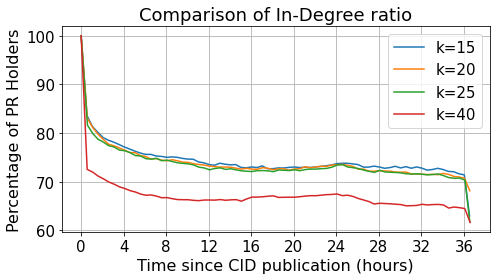

In [6]:
# Compare the in-degree ratio of PR Holders in K closest peers over fetch rations (PERCENTAGES) 
# NOTE: might take several minutes depending on the number of DBs, fetch_rounds and k value

# Formula to compute the in_degree on a PR Holder set into a given K_closest peers set
def get_in_degree(org, new) -> int:
    in_degree = 0
    for new_peer in new:
        if new_peer in org:
            in_degree += 1
    return in_degree

# Get the ping rounds
ping_rounds = pd.read_sql_query("""select ping_round from fetch_results group by ping_round order by ping_round ASC;""", dbs[0])

fig, ax = plt.subplots(figsize=(7,4))

# Iterate over the existing DBs
for idx, con in enumerate(dbs):
    print(f"db {idx+1}/{len(dbs)}")
    a_dist = []
    max_value = 0
    # get the max value by checking the K value of the first CID
    k = pd.read_sql_query("select k, count(k) from cid_info group by k;", con)
    max_value = max(k["k"])
    
    # Get the CID Publish times for the CIDs
    pub_times = pd.read_sql_query("""
        select cid_hash, gen_time from cid_info order by cid_hash;
        """, con)
    
    hours_since_pub = []
    hours_since_pub.append(0)
    
    # Get PR Holders for each CID
    pr_holders = pd.read_sql_query("""select cid_hash, peer_id from pr_holders order by cid_hash;""", con)

    init_holders = {}
    for i, r in pr_holders.iterrows():
        if r['cid_hash'] not in init_holders:
            init_holders[r['cid_hash']] = []
        init_holders[r['cid_hash']].append(r['peer_id'])

    init_in_degree = []
    
    # Get in-degree of the first round - should give 10/10 
    for cid in init_holders:
        in_d = get_in_degree(init_holders[cid], init_holders[cid])
        ## get percentage of the in-degree peers
        in_d = (in_d / max_value) * 100
        init_in_degree.append(in_d)

    a_dist.append(np.median(init_in_degree))

    for i, r in ping_rounds.iterrows():
        if r['ping_round'] == 0: # first round has no closest peers
            continue
            
        # Calculate the time of pinging each round (to display it hours since publicatoin)
        fetch_round = pd.read_sql_query(f"""
        select cid_hash, fetch_time, fetch_duration from fetch_results where ping_round={r['ping_round']} order by cid_hash;
        """, con)
        
        fetch_round['time of pub'] = (fetch_round['fetch_time'] - pub_times['gen_time']) / 3600 # get the hours since publish time
        pp = fetch_round['time of pub'].to_numpy()
        hours_since_pub.append(np.median(pp))
        
        round_close_peers = {}
        close_peers = pd.read_sql_query(f"""
        select cid_hash, peer_id from k_closest_peers where ping_round={r['ping_round']} order by cid_hash;
        """, con)

        # Filter out the K closest peers by CID
        for i, r in close_peers.iterrows():
            if r['cid_hash'] not in round_close_peers:
                round_close_peers[r['cid_hash']] = []

            round_close_peers[r['cid_hash']].append(r['peer_id'])

        # Get the in-degree of the PR Holders and the rounds of K closest peers
        round_close_p_dist = []
        for c in init_holders:
            in_d = 0
            try:
                in_d = get_in_degree(init_holders[c], round_close_peers[c])    
            except:
                in_d = 0
            ## get percentage of the in-degree peers
            in_d = (in_d / max_value) * 100
            round_close_p_dist.append(in_d) 
       
        a_dist.append(np.mean(round_close_p_dist))
    
    ax.plot(hours_since_pub, a_dist, label=db_labels[idx])

# avg
ax.set_title('Comparison of In-Degree ratio', fontsize=18)
ax.set_xlabel("Time since CID publication (hours)", fontsize=16) # TODO: hardcoded to 30 mins
ax.set_ylabel("Percentage of PR Holders", fontsize=16)
ax.legend(loc='upper right', prop={'size': 15})
ticks = np.linspace(0, 36, 10)
ax.set_xticks(ticks, ticks.astype(int))
ax.grid()


plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)

plt.tight_layout()
plt.show()

In [18]:
# Close all the connections with the databases
for con in dbs:
    con.close()